# Final Project

The final project is designed to let you apply what you have learned so far, and demonstrate that you have mastered it. The submission will be graded on the correctness and performance of the execution of your analysis (50%), the ambitiousness of the problems chosen (30%), and the creativity of your questions and solutions (20%).

Your submission should include all outputs and be self-contained, so it can be executed if necessary.

The submission includes two parts:
1. this notebook
2. a 15-min presentation, to be held on May 7 and May 9


## Submission
The project is due on ***May 06, 23:59 CET***. Late submissions will not be considered, and graded as 0. To submit, please:

1. copy this file and all additional data into a folder with your group ID
3. zip the folder
4. send a copy or link to a copy of the zip file to Dirk Hovy <dirk.hovy@unibocconi.it> and Tommaso Fornaciari <fornaciari@unibocconi.it>

## 1. Data, Preprocessing, and Annotation (5 pts)

Find a data set with a dependent variable you can learn to predict. Kaggle is a good place to start, or the Google data set search. The data set should have **at least 10,000** documents! 

Out of these, **at least 2000 instances** need to be labeled. If there is no label provided, you can annotate your own. You can get up to **2 bonus points** for annotation, depending on amount and complexity of the annotation.

Briefly (max. 100 words!) describe the content and type of the data set, and what you are planning to look at. 

...

Preprocess the data and explain (max. 200 words) which preprocessing steps you chose and why, and give statistics of the number of documents, types, and tokens, before and after preprocessing.

...

In [1]:
# your code here
# merge the files in dataset into one txt file
import os
root='/Users/yeweiting/Downloads/aclImdb/train/unsup'
filelist=os.listdir('/Users/yeweiting/Downloads/aclImdb/train/unsup')
root1='/Users/yeweiting/Downloads/aclImdb/train/pos'
filelist1=os.listdir('/Users/yeweiting/Downloads/aclImdb/train/pos')
root2='/Users/yeweiting/Downloads/aclImdb/train/neg'
filelist2=os.listdir('/Users/yeweiting/Downloads/aclImdb/train/neg')

with open('unsup_file.txt','a+',encoding='utf-8') as newfile:
    for file in filelist:
        txt=open(os.path.join(root,file),encoding='utf-8')
        newfile.write(txt.read()+"\n")
newfile.close()

with open('pos_file.txt','a+',encoding='utf-8') as newfile:
    for file in filelist1:
        txt=open(os.path.join(root1,file),encoding='utf-8')
        newfile.write(txt.read()+"\n")
newfile.close()

with open('neg_file.txt','a+',encoding='utf-8') as newfile:
    for file in filelist2:
        txt=open(os.path.join(root2,file),encoding='utf-8')
        newfile.write(txt.read()+"\n")
newfile.close()

##### Dataset Description:

Here I choose a dataset which contains movie reviews along with their associated binary sentiment polarity labels. 

The core dataset contains 50,000 reviews split evenly into 25k training and 25k test sets. The overall distribution of labels is balanced (25k pos and 25k neg). There are also additional 50,000 unlabeled documents for unsupervised learning. 

Here to accelerate the processing time, I concatunate the positive and negative reviews in the training set (25,000 in all) and decide to use their sentiment labels as the category in carrying out latent topics analysis.

In [2]:
#read the files of positive and negative reviews inspectively and export the files into a dataframe
import pandas as pd
pos_reviews = [line.strip() for line in open('/Users/yeweiting/Downloads/NLP/pos_file.txt', encoding='utf8')]
df_pos = pd.DataFrame(pos_reviews,columns=["review"])
df_pos['attitude']='positive'

In [3]:
neg_reviews = [line.strip() for line in open('/Users/yeweiting/Downloads/NLP/neg_file.txt', encoding='utf8')]
df_neg = pd.DataFrame(neg_reviews,columns=["review"])
df_neg['attitude']='negative'

In [4]:
# concatenate the reviews and also keep the attitude
df = pd.concat([df_pos,df_neg], axis=0, join='inner', ignore_index=True)
df.head()

,review,attitude
0,For a movie that gets no respect there sure ar...,positive
1,Bizarre horror movie filled with famous faces ...,positive
2,"A solid, if unremarkable film. Matthau, as Ein...",positive
3,It's a strange feeling to sit alone in a theat...,positive
4,"You probably all already know this by now, but...",positive


In [5]:
df.tail()

,review,attitude
24995,"My comments may be a bit of a spoiler, for wha...",negative
24996,"The ""saucy"" misadventures of four au pairs who...",negative
24997,"Oh, those Italians! Assuming that movies about...",negative
24998,Eight academy nominations? It's beyond belief....,negative
24999,"Not that I dislike childrens movies, but this ...",negative


In [6]:
df.shape

(25000, 2)

In [7]:
#count the number of tokens
import spacy

nlp = spacy.load('en', disable=['tagger', 'parser', 'ner'])

documents = df.review.apply(str).tolist()
tokens = [token.text for sentence in documents[:25000] for token in nlp(sentence)]
len(tokens)

6810246

In [8]:
from collections import Counter

c = Counter(tokens)
len(c)

121767

In [9]:
dict_sum={" ":["documents","types","tokens"],"The number of":[25000,len(c),len(tokens)]}
df_sum=pd.DataFrame(dict_sum)

df_sum.set_index(' ')

,The number of
,
documents,25000
types,121767
tokens,6810246


##### Before preprocessing, the number of documents is 25,000. There are 6,810,246 tokens and 121,767 different types of them.

In [10]:
import nltk
import matplotlib.pyplot as plt
freq = nltk.FreqDist(tokens)

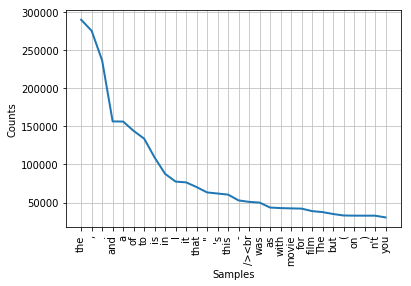

In [11]:
freq.plot(30, cumulative=False)

From the plotting of the token frequency, we see that there are many meaningless punctuations and prepositions counting for a large number of the tokens.

Now we apply data cleaning.

In [12]:
def clean_text(text):
    """ 
    Here to make expressions like "'s", "'t" and "'ll" more meaningful by splitting one word into two. 
    """
    
    import re
    
    text = [sentence.lower() for sentence in text]
    text = [re.sub(r"\s+", " ", sentence) for sentence in text]
    text = [re.sub(r"\\", "", sentence) for sentence in text]
    text = [re.sub(r"([,.!])([^\s])", r"\1 \2",sentence) for sentence in text]
    text = [re.sub(r"that's","that is",sentence) for sentence in text]
    text = [re.sub(r"there's","there is",sentence) for sentence in text]
    text = [re.sub(r"what's","what is",sentence) for sentence in text]
    text = [re.sub(r"where's","where is",sentence) for sentence in text]
    text = [re.sub(r"it's","it is",sentence) for sentence in text]
    text = [re.sub(r"who's","who is",sentence) for sentence in text]
    text = [re.sub(r"i'm","i am",sentence) for sentence in text]
    text = [re.sub(r"i've","i have",sentence) for sentence in text]
    text = [re.sub(r"i'll","i will",sentence) for sentence in text]
    text = [re.sub(r"she'll","she will",sentence) for sentence in text]
    text = [re.sub(r"he'll","he will",sentence) for sentence in text]
    text = [re.sub(r"it'll","it will",sentence) for sentence in text]
    text = [re.sub(r"you'll","you will",sentence) for sentence in text]
    text = [re.sub(r"she's","she is",sentence) for sentence in text]
    text = [re.sub(r"didn't","did not",sentence) for sentence in text]
    text = [re.sub(r"doesn't","does not",sentence) for sentence in text]
    text = [re.sub(r"don't","do not",sentence) for sentence in text]
    text = [re.sub(r"he's","he is",sentence) for sentence in text]
    text = [re.sub(r"they're","they are",sentence) for sentence in text]
    text = [re.sub(r"who're","who are",sentence) for sentence in text]
    text = [re.sub(r"you're","you are",sentence) for sentence in text]
    text = [re.sub(r"ain't","am not",sentence) for sentence in text]
    text = [re.sub(r"wouldn't","would not",sentence) for sentence in text]
    text = [re.sub(r"doesn't","does not",sentence) for sentence in text]
    text = [re.sub(r"shouldn't","should not",sentence) for sentence in text]
    text = [re.sub(r"should've","should have",sentence) for sentence in text]
    text = [re.sub(r"would've","would have",sentence) for sentence in text]
    text = [re.sub(r"can't","can not",sentence) for sentence in text]
    text = [re.sub(r"couldn't","could not",sentence) for sentence in text]
    text = [re.sub(r"let's","let us",sentence) for sentence in text]
    text = [re.sub(r"i'd","i would",sentence) for sentence in text]
    text = [re.sub(r"isn't","is not",sentence) for sentence in text]
    text = [re.sub(r"wasn't","was not",sentence) for sentence in text]
    text = [re.sub(r"weren't","were not",sentence) for sentence in text]
    text = [re.sub(r"won't","will not",sentence) for sentence in text]
    text = [re.sub(r"we're","we are",sentence) for sentence in text]
    text = [re.sub(r"we've","we have",sentence) for sentence in text]
    text = [re.sub(r"hadn't","had not",sentence) for sentence in text]
    text = [re.sub(r"\\*'s"," 's",sentence) for sentence in text]
    text = [re.sub(r"[^\w\s]","",sentence) for sentence in text]
    return text

In [13]:
cleaned_text = clean_text(documents)

In [14]:
df2 = pd.DataFrame(cleaned_text,columns=["review"])
df2.head()

,review
0,for a movie that gets no respect there sure ar...
1,bizarre horror movie filled with famous faces ...
2,a solid if unremarkable film matthau as einste...
3,it is a strange feeling to sit alone in a thea...
4,you probably all already know this by now but ...


To perform sentimental analysis, now we are removing the punctuations and the stopwords, making bigrams and lemmatizing our corpus by keeping only 'NOUN', 'ADJ', 'VERB', 'ADV'.

In [15]:
def sent_to_words(sentences):
    
    from gensim.utils import simple_preprocess
    
    for sentence in sentences:
        yield(simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

def remove_stopwords(texts):
    
    from gensim.utils import simple_preprocess
    from nltk.corpus import stopwords
    stop_words = stopwords.words('english')
    stop_words.extend(["'s"])
    
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(data_words, texts):
    
    from gensim.models import Phrases
    from gensim.models import phrases
    
    bigram = Phrases(data_words, min_count=5, threshold=100)
    bigram_mod = phrases.Phraser(bigram)
    
    return [bigram_mod[doc] for doc in texts]


def lemmatize(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    
    import spacy
    
    nlp = spacy.load('en', disable=['parser', 'ner'])
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        
    return texts_out

In [16]:
from gensim.models import ldamodel    
import gensim.corpora as corpora
    
import warnings
import logging
    
    
logging.basicConfig(format = '%(asctime)s : %(levelname)s : %(message)s', level = logging.ERROR)
warnings.filterwarnings("ignore", category = DeprecationWarning)
    
data_words = list(sent_to_words(cleaned_text))
    
data_words_nostops = remove_stopwords(data_words)
    
data_words_bigrams = make_bigrams(data_words, data_words_nostops)
    
data_lemmatized = lemmatize(data_words_bigrams, allowed_postags = ['NOUN', 'ADJ', 'VERB', 'ADV'])

In [17]:
data_lemmatized[:1]

[['movie',
  'get',
  'respect',
  'sure',
  'lot',
  'memorable_quote',
  'list',
  'gem',
  'imagine',
  'movie',
  'joe_piscopo',
  'actually',
  'funny',
  'maureen_stapleton',
  'scene',
  'stealer',
  'moroni',
  'character',
  'absolute',
  'scream',
  'watch',
  'alan',
  'skipper',
  'hale',
  'jr',
  'police']]

In [18]:
tokens = [token for sentence in data_lemmatized[:25000] for token in sentence]
len(tokens)

2792576

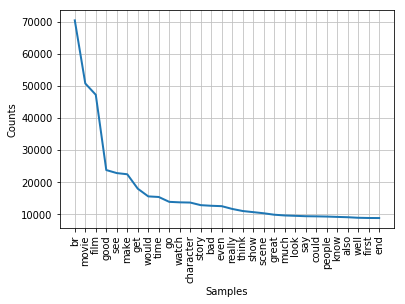

In [19]:
## now the most frequent words seem to make more sense
freq = nltk.FreqDist(tokens)
freq.plot(30, cumulative=False)

In [20]:
cleaned_reviews=[]
for document in data_lemmatized:
    document_temp=[]
    for word in document:
        document_temp.append(word)
        str_temp = " ".join(document_temp)
    cleaned_reviews.append(str_temp)
        

In [21]:
len(cleaned_reviews)

25000

In [22]:
cleaned_reviews[:1]

['movie get respect sure lot memorable_quote list gem imagine movie joe_piscopo actually funny maureen_stapleton scene stealer moroni character absolute scream watch alan skipper hale jr police']

In [23]:

c = Counter(tokens)
dict_sum_post={" ":["documents","types","tokens"],"The number of":[25000,len(c),len(tokens)]}
df_sum_post=pd.DataFrame(dict_sum_post)

df_sum_post.set_index(' ')

,The number of
,
documents,25000
types,83071
tokens,2792576


##### After preprocessing, the number of documents is 25,000. There are 2,792,576 tokens and 83,071 different types of them.

In [24]:
df3 = pd.DataFrame(cleaned_reviews,columns=["review"])
df3.head()

,review
0,movie get respect sure lot memorable_quote lis...
1,bizarre horror movie fill famous face steal cr...
2,solid unremarkable film matthau einstein wonde...
3,strange feeling sit alone theater occupy paren...
4,probably already know additional episode never...


In [25]:
df3['attitude']=''
df3.iloc[:12500,1]='positive'
df3.iloc[12500:,1]='negative'

In [26]:
df3.head()

,review,attitude
0,movie get respect sure lot memorable_quote lis...,positive
1,bizarre horror movie fill famous face steal cr...,positive
2,solid unremarkable film matthau einstein wonde...,positive
3,strange feeling sit alone theater occupy paren...,positive
4,probably already know additional episode never...,positive


In [27]:
df3.tail()

,review,attitude
24995,comment may bit spoiler worth stop care enough...,negative
24996,saucy misadventur pair arrive london day early...,negative
24997,italian assume movie aristocrat weird fetish c...,negative
24998,academy nomination beyond_belief think bad yea...,negative
24999,dislike children movie tearjerker redeeming_qu...,negative


In [28]:
documents = df3.review.apply(str).tolist()

##### Also the same preprocessing procedures for the merged test data.

In [29]:
test_pos_reviews = [line.strip() for line in open('/Users/yeweiting/Downloads/NLP/final_project/test_pos_file.txt', encoding='utf8')]
df_pos = pd.DataFrame(test_pos_reviews,columns=["review"])
df_pos['attitude']='positive'

In [30]:
test_neg_reviews = [line.strip() for line in open('/Users/yeweiting/Downloads/NLP/final_project/test_neg_file.txt', encoding='utf8')]
df_neg = pd.DataFrame(test_neg_reviews,columns=["review"])
df_neg['attitude']='negative'

In [31]:
test_df = pd.concat([df_pos,df_neg], axis=0, join='inner', ignore_index=True)

In [32]:
test_documents = test_df.review.apply(str).tolist()

In [33]:
test_cleaned_text = clean_text(test_documents)

In [34]:
logging.basicConfig(format = '%(asctime)s : %(levelname)s : %(message)s', level = logging.ERROR)
warnings.filterwarnings("ignore", category = DeprecationWarning)

data_words = list(sent_to_words(test_cleaned_text))
    
data_words_nostops = remove_stopwords(data_words)
    
data_words_bigrams = make_bigrams(data_words, data_words_nostops)
    
test_data_lemmatized = lemmatize(data_words_bigrams, allowed_postags = ['NOUN', 'ADJ', 'VERB', 'ADV'])

In [35]:
cleaned_reviews=[]
for document in test_data_lemmatized:
    document_temp=[]
    for word in document:
        document_temp.append(word)
        str_temp = " ".join(document_temp)
    cleaned_reviews.append(str_temp)
        

In [36]:
df4 = pd.DataFrame(cleaned_reviews,columns=["review"]) 
df4.head()

,review
0,base actual story john_boorman show struggle a...
1,gem film production anticipate quality indeed ...
2,really show drama romance comedy roll married ...
3,good experience disney themepark certainly goo...
4,korean movie see really stuck first excellent ...


In [37]:
test_documents = df4.review.apply(str).tolist()

In [38]:
df4['attitude']=''
df4.iloc[:12500,1]='positive'
df4.iloc[12500:,1]='negative'

In [39]:
df4.head() # the dataframe for the test data

,review,attitude
0,base actual story john_boorman show struggle a...,positive
1,gem film production anticipate quality indeed ...,positive
2,really show drama romance comedy roll married ...,positive
3,good experience disney themepark certainly goo...,positive
4,korean movie see really stuck first excellent ...,positive


## 2. Research Question(s) (3 pts)

Describe what question you are investigating with the data (max. 100 words)

...

###### With the labeled corpus on movie reviews, we are performing sentimental analysis to get the best predictive model to fit future unlabeled movie reviews. This kind of reviews can be short posts on social media (doesn't have to be posted on specific review website such as IMDB). The movie issuer or critics can grasp the sentimental tendency of their movies by analyzing posts from social media. With a more predictive model, this analysis could be more accurate.

## 3. Analysis (6 pts)

Apply at least one version of *each* of the following analysis methods to the data set (justify your choices):
1. Topic modeling with LDA (3 pts). Justify your choice of number of topics!
2. Dense word embeddings ***or*** document embeddings (3 pts)

Your analysis needs to be run on **at least 10,000** preprocessed documents!

#### Other methods
If appropriate for your problem, feel free to explore other methods, as long as they do not require additional libraries (**up to 2 bonus points**).

### Topic modeling with LDA

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='word', min_df=0.001, max_df=0.75, stop_words='english', sublinear_tf=True)

X = vectorizer.fit_transform(documents)

In [41]:
X.shape

(25000, 7862)

In [42]:
from gensim.models import LdaMulticore, TfidfModel
from gensim.corpora import Dictionary
import time # to know how long training took
import multiprocessing # to speed things up by parallelizing

# get dictionary
instances = df3.review.apply(str.split)[:25000] #str.split creates a list of each single word
print("creating dictionary", flush=True)
# read in instances and create Dictionary object with information about frequencies etc. 
dictionary = Dictionary(instances)
# get rid of words that are too rare or too frequent
dictionary.filter_extremes(no_below=100, no_above=0.1)
print(dictionary, flush=True)

creating dictionary
Dictionary(2713 unique tokens: ['absolute', 'alan', 'gem', 'imagine', 'jr']...)


In [43]:
#replace words by their numerical IDs and their frequency
print("translating corpus to IDs", flush=True)
ldacorpus = [dictionary.doc2bow(text) for text in instances]
# learn TFIDF values from corpus
print("tf-idf transformation", flush=True)
tfidfmodel = TfidfModel(ldacorpus)
# transform raw frequencies into TFIDF
model_corpus = tfidfmodel[ldacorpus]

num_topics = 4 

# find chunksize to make about 200 updates
num_passes = 10
chunk_size = len(model_corpus) * num_passes/200
print(chunk_size)

start = time.time()
print("fitting model", flush=True)
model = LdaMulticore(model_corpus, # what to train on
                     num_topics=num_topics, # number of topics
                     id2word=dictionary, # mappinf from IDs to words
                     workers=min(10, multiprocessing.cpu_count()-1), # choose 10 cores, or whatever computer has
                     passes=num_passes, # make this many passes over data
                     chunksize=chunk_size # update after this many instances
                     # alpha = 0.0001 change the peakness
                    )
    
print("done in {}".format(time.time()-start), flush=True)

translating corpus to IDs
tf-idf transformation
1250.0
fitting model
done in 176.5772829055786


##### According to the LDA plotting in the visualization part, 4 is the largest number of topics where there is no serious overlapping.

In [44]:
import re

# transform the data into topic distros
topic_corpus = model[model_corpus]

# get the topic descritions
topic_sep = re.compile(r"0\.[0-9]{3}\*") # getting rid of useless formatting
# extract a list of tuples with topic number and descriptors from the model
model_topics = [(topic_no, re.sub(topic_sep, '', model_topic).split(' + ')) for topic_no, model_topic in
                model.print_topics(num_topics=num_topics, num_words=10)]

descriptors = []
for i, m in model_topics:
    print(i+1, ", ".join(m[:10]))
    descriptors.append(", ".join(m[:2]).replace('"', ''))

1 "war", "kill", "action", "series", "fight", "episode", "soldier", "murder", "game", "police"
2 "book", "family", "music", "version", "beautiful", "audience", "song", "novel", "comedy", "true"
3 "kid", "episode", "series", "disney", "season", "cartoon", "tv", "laugh", "animation", "remember"
4 "waste", "horror", "terrible", "awful", "stupid", "money", "horrible", "laugh", "crap", "rent"


##### As inferred from the shown topics, 4 latent topics may be concluded as:
- documentary or fight movies
- comedies focused on family affection with highly reputed songs
- animational movies and cartoons
- horrible movies with negative comments

Here we build the LDA model used for later visualizing the latent topics of both postive and negative reviews inspectively.

In [45]:
import warnings
warnings.filterwarnings("ignore")

id2word = corpora.Dictionary(data_lemmatized)
    
corpus = [id2word.doc2bow(text) for text in data_lemmatized]
    
lda_model = ldamodel.LdaModel(corpus = corpus,
                              id2word = id2word,
                              num_topics = 4, 
                              random_state = 1,
                              update_every = 1,
                              chunksize = 50,
                              passes = 20,
                              alpha = 'auto',
                              per_word_topics = True)

In [46]:
id2word_pos = corpora.Dictionary(data_lemmatized[:12500])
    
corpus_pos = [id2word_pos.doc2bow(text) for text in data_lemmatized[:12500]]
    
lda_model_pos = ldamodel.LdaModel(corpus = corpus_pos,
                              id2word = id2word_pos,
                              num_topics = 4, 
                              random_state = 1,
                              update_every = 1,
                              chunksize = 50,
                              passes = 20,
                              alpha = 'auto',
                              per_word_topics = True)

In [47]:
id2word_neg = corpora.Dictionary(data_lemmatized[12500:])
    
corpus_neg = [id2word_neg.doc2bow(text) for text in data_lemmatized[12500:]]
    
lda_model_neg = ldamodel.LdaModel(corpus = corpus_neg,
                              id2word = id2word_neg,
                              num_topics = 4, 
                              random_state = 1,
                              update_every = 1,
                              chunksize = 50,
                              passes = 20,
                              alpha = 'auto',
                              per_word_topics = True)

### Dense word embeddings

In [48]:
# word embedding
df_pos = df3[:12500]
df_neg = df3[12500:]

In [49]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence/document"
    corpus = []
    for col in ['review']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus

In [50]:
corpus_pos = build_corpus(df_pos) 
corpus_neg = build_corpus(df_neg)
corpus_all = build_corpus(df3)

In [51]:
from gensim.models import word2vec

# to accelerate the processing time, here I set the number of dimensions to 100 (size=100)
# and to create a more selective model, the minimum counts of times are set to 500
model_pos = word2vec.Word2Vec(corpus_pos, size=100, window=20, min_count=500, workers=4)
model_neg = word2vec.Word2Vec(corpus_neg, size=100, window=20, min_count=500, workers=4)
model_all = word2vec.Word2Vec(corpus_all, size=100, window=20, min_count=500, workers=4)

In [52]:
model_neg.wv['horror'] # take the word "horror" for example, let's see how its vector looks like

array([ 0.43464586, -0.72880715,  2.6493988 , -0.2674868 , -1.1481091 ,
        0.7020078 , -1.3094548 , -1.870002  , -0.60066587, -1.5121411 ,
        2.0802612 ,  2.4153638 ,  0.37230283,  0.5806112 , -1.3381532 ,
        0.36152944, -0.6029127 , -0.9962622 ,  1.1565166 , -0.6473512 ,
        1.7553961 , -0.3859994 ,  0.2829293 ,  1.5290023 ,  1.9894307 ,
        1.2164162 ,  0.71938896, -0.9800382 , -0.44122463,  1.8149506 ,
        0.15467097,  0.82242805,  3.3191369 ,  2.546611  , -0.45929804,
       -0.6467392 ,  0.97953224,  2.3706467 ,  1.6358813 , -0.06014149,
        0.52997214,  0.2567215 ,  0.9391879 ,  0.05966284, -1.4432312 ,
        1.2393469 ,  1.0719906 , -1.0141635 ,  0.5612195 ,  1.6584033 ,
       -0.4557171 , -0.61109036,  0.52077574,  0.6007039 , -1.6201987 ,
       -2.9822557 ,  0.34034118, -0.7380174 ,  0.08601613,  1.7239077 ,
        1.0655491 , -0.63413584,  0.8092495 ,  0.9529963 , -0.5205121 ,
       -0.7607346 , -2.0694337 ,  0.401378  ,  0.9671516 , -0.07

In [53]:
print("Shape of model_pos: {}".format(model_pos.wv.vectors.shape))
print("Shape of model_neg: {}".format(model_neg.wv.vectors.shape))
print("Shape of model_all: {}".format(model_all.wv.vectors.shape))

Shape of model_pos: (445, 100)
Shape of model_neg: (438, 100)
Shape of model_all: (840, 100)


In [54]:
model_all.wv.index2word[-10:]

['extra',
 'violent',
 'christma',
 'cause',
 'former',
 'soul',
 'hole',
 'solid',
 'taste',
 'memory']

### Clustering

In [55]:
# in order to see the word clusters in 3D
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import TruncatedSVD
k = 5

# reduce the dimensionality of the input
%time svd = TruncatedSVD(n_components=300).fit_transform(X)

agg = AgglomerativeClustering(n_clusters=k)

CPU times: user 15.1 s, sys: 1.45 s, total: 16.5 s
Wall time: 13.5 s


In [56]:
sample = np.random.choice(len(svd), replace=False, size=8000)
%time agg_sample = agg.fit_predict(svd[sample])

CPU times: user 12.5 s, sys: 540 ms, total: 13 s
Wall time: 13.5 s


In [57]:
# let's get the centroid/average of each cluster
centroids = np.array([svd[sample][agg_sample == c].mean(axis=0) for c in range(k)])
# initialize k-means with the agglomerative clusters
km = KMeans(n_clusters=k, n_jobs=-1, init=centroids)

%time km.fit(svd)

CPU times: user 1.23 s, sys: 121 ms, total: 1.35 s
Wall time: 1.38 s


KMeans(algorithm='auto', copy_x=True,
    init=array([[ 1.93934e-01,  1.11147e-02, ..., -4.37216e-04,  3.06477e-04],
       [ 1.74947e-01, -4.05338e-02, ..., -4.90979e-04, -1.86351e-05],
       ...,
       [ 2.08848e-01,  6.11727e-03, ..., -5.58745e-04, -8.25308e-04],
       [ 2.06333e-01,  1.01041e-01, ...,  2.46425e-03,  6.76604e-04]]),
    max_iter=300, n_clusters=5, n_init=10, n_jobs=-1,
    precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

## 4. Prediction (10 pts)

Build a predictive model of the target label and use appropriate performance metrics. Your predictive analysis needs to involve **all** of the following, summarized in a table:

1. a most-frequent-label baseline (1 point)
2. a `LogisticRegression()` 5CV baseline with default parameters (2 pts)
3. the performance of at least one more predictive model architecture (3 pts), including description/justification of the optmization steps taken (2 pts). Do make sure that the optimization steps do *not* include the test folds!
4. bootstrap sampling significance tests of the performance difference between your best model and the two baselines (2 pts)

##### Neural networks
You can get **up to 3 bonus points** for your own neural net implementations in `keras`.

### A most-frequent-label baseline

In [58]:
# your code here


from sklearn.preprocessing import LabelEncoder

# transform labels into numbers
labels2numbers = LabelEncoder()

y = labels2numbers.fit_transform(df3['attitude'])
print(y[:10], y[-10:], len(y))

[1 1 1 1 1 1 1 1 1 1] [0 0 0 0 0 0 0 0 0 0] 25000


In [59]:
# transform text into word counts
# IMPORTANT: use same vectorizer we fit on training data to create vectors!
# use ".transform()" on test data, use ".fit_transform()" on training data

new_X = vectorizer.transform(df4['review'])
# ALSO IMPORTANT: use same label transformer
new_y = labels2numbers.transform(df4['attitude']) 

In [60]:
# most-frequent-label baseline
from sklearn.dummy import DummyClassifier
clf_random = DummyClassifier(strategy='most_frequent',random_state=0)
clf_random.fit(X, y)

DummyClassifier(constant=None, random_state=0, strategy='most_frequent')

In [61]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

from sklearn.metrics import classification_report # comprehensive output report

warnings.filterwarnings("ignore")

random_predictions = clf_random.predict(new_X)
print(classification_report(new_y, random_predictions))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     12500
           1       0.00      0.00      0.00     12500

   micro avg       0.50      0.50      0.50     25000
   macro avg       0.25      0.50      0.33     25000
weighted avg       0.25      0.50      0.33     25000



### A LogisticRegression() 5CV baseline with default parameters

In [62]:
# Logistic regression

from sklearn.linear_model import LogisticRegression
## with default parameters, just classifier=LogisticRegression()
classifier = LogisticRegression() 
%time classifier.fit(X, y)
print(classifier)

CPU times: user 637 ms, sys: 41.2 ms, total: 679 ms
Wall time: 410 ms
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [63]:
k = vectorizer.vocabulary_['great'] # position for the word 'great'
print(vectorizer.get_feature_names()[k], classifier.coef_[0, k])

great 6.970586892089424


In [64]:
# use the old classifier to predict and evaluate the test data
new_predictions = classifier.predict(new_X)
print(classification_report(new_y, new_predictions))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88     12500
           1       0.87      0.88      0.88     12500

   micro avg       0.88      0.88      0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



In [72]:
cv_lg = cross_val_score(classifier, X, y=y, cv=5, scoring="f1_micro")
print("5-CV on train: {}".format(cv_lg.mean()))

5-CV on train: 0.87668


###### Above are the baselines for model selection. 
Then we try some different classifiers and see their accuracy.

In [65]:
from sklearn.model_selection import cross_val_score

best_c = None
best_f1_score = 0.0
for c in [10, 1.0, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001]:
    clf = LogisticRegression(C=c, solver='lbfgs').fit(X, y)
    cv_reg = cross_val_score(clf, X, y=y, cv=5, n_jobs=-1, scoring="f1_micro")

    new_predictions_regularized = clf.predict(new_X)
    print("5-CV on train at C={}: {}".format(c, cv_reg.mean()))
    print(classification_report(new_y, new_predictions_regularized))
    print()
    f1 = f1_score(new_y, new_predictions_regularized, average='micro')
    if f1 > best_f1_score:
        best_f1_score = f1
        best_c = c

5-CV on train at C=10: 0.87096
              precision    recall  f1-score   support

           0       0.86      0.87      0.86     12500
           1       0.87      0.86      0.86     12500

   micro avg       0.86      0.86      0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000


5-CV on train at C=1.0: 0.87668
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     12500
           1       0.87      0.88      0.88     12500

   micro avg       0.88      0.88      0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000


5-CV on train at C=0.5: 0.87332
              precision    recall  f1-score   support

           0       0.88      0.87      0.87     12500
           1       0.87      0.89      0.88     12500

   micro avg       0.88      0.88      0.88     25000
   macro avg       0.88      0.

In [66]:
X.shape # more examples than features

(25000, 7862)

In [67]:
# test a regularized classifier
clf = LogisticRegression(C=best_c, solver='lbfgs')

cv_reg = cross_val_score(clf, X, y=y, cv=5, n_jobs=-1, scoring="f1_micro")
print("5-CV on train: {}".format(cv_reg.mean()))

5-CV on train: 0.87668


### A more predictive model: Feature Selection with Stability (Logistic Regression and Neural Network trial)

In [68]:
# Optimization: choose better features
import numpy as np

def RLR(X, y, target, vectorizer, selection_threshold=0.1, num_iters=200):
    n_instances, n_feats = X.shape
    
    pos_scores_ = [] # all coefficient > 0
    neg_scores_ = [] # all coefficient < 0
    # choices for lambda weight
    penalities = [10,5,2,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0001, 0.00001]

    
    # select repeated subsamples
    for iteration in range(num_iters):
        # initialize a model with randomly-weighted L1 penalty
        # IMPORTANT: we need a different solver
        clf = LogisticRegression(penalty='l1', C=penalities[np.random.randint(len(penalities))], solver='liblinear')

        # choose a random subset of indices of the data with replacement
        selection = np.random.choice(n_instances, size=int(n_instances * 0.75))
        try:
            clf.fit(X[selection], y[selection])
        except ValueError as ve:
            print(ve.with_traceback())
            continue

        # record which coefficients got a positive or negative score
        pos_scores_.append(clf.coef_ > 0)
        neg_scores_.append(clf.coef_ < 0)

    # normalize the counts
    pos_scores_ = (np.array(pos_scores_).sum(axis=0)/num_iters).reshape(-1)
    neg_scores_ = (np.array(neg_scores_).sum(axis=0)/num_iters).reshape(-1)

    # find the features corresponding to the non-zero coefficients
    features = vectorizer.get_feature_names()
    pos_positions = [i for i, v in enumerate(pos_scores_ >= selection_threshold) if v]
    neg_positions = [i for i, v in enumerate(neg_scores_ >= selection_threshold) if v]

    pos = [(features[i], pos_scores_[i]) for i in pos_positions]
    neg = [(features[i], neg_scores_[i]) for i in neg_positions]

    posdf = pd.DataFrame(pos, columns='term score'.split()).sort_values('score', ascending=False)
    negdf = pd.DataFrame(neg, columns='term score'.split()).sort_values('score', ascending=False)

    return posdf, negdf

In [69]:
pos, neg = RLR(X, y, 0, vectorizer=vectorizer)

In [73]:
best = pos.term.tolist() + neg.term.tolist()
ids = [vectorizer.vocabulary_[i] for i in best]
X_selection = X[:, ids]

clf_RLR = LogisticRegression(solver='lbfgs', C=100)

clf_RLR.fit(X[:, ids], y)

print(X_selection.shape)
cv_RLR_optd=cross_val_score(estimator=clf_RLR, X=X_selection, y=y, cv=5, scoring='f1_micro')
print("5-CV on train: {}".format(cv_RLR_optd.mean()))

(25000, 2295)
5-CV on train: 0.8905200000000001


#### The RLR model has an improved cross-validation score as 89.05%, accuracy increased by 89.052-87.668=1.384%.

In [74]:
new_predictions_RLR = clf_RLR.predict(new_X[:, ids])
print(classification_report(new_y, new_predictions_RLR))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85     12500
           1       0.86      0.85      0.85     12500

   micro avg       0.85      0.85      0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



In [75]:
## neural network
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
import keras

max_features = 2000

# read in the training data
train_data = df3
print(len(train_data), train_data['attitude'].unique())

# create TFIDF representations
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=0.001, max_df=0.75, stop_words='english', max_features=max_features)

X_train = vectorizer.fit_transform(train_data.review)
print(X_train.shape)

# transform labels into numbers
labels2numbers = LabelEncoder()

y_train_org = labels2numbers.fit_transform(train_data['attitude'])
print(y_train_org[:10], len(y_train_org))



# read in test data
test_data=df4
print(len(test_data), test_data['attitude'].unique())

X_test = vectorizer.transform(test_data.review)
print(X_test.shape)

y_test_org = labels2numbers.transform(test_data['attitude'])
print(y_test_org[:10], len(y_test_org))

# get number of classes for transformation
num_classes = max(y_train_org) + 1

print('Convert class vector to binary 1-hot encoding matrix (for use with categorical_crossentropy)')
y_train = keras.utils.to_categorical(y_train_org, num_classes)
y_test = keras.utils.to_categorical(y_test_org, num_classes)

Using TensorFlow backend.


25000 ['positive' 'negative']
(25000, 2000)
[1 1 1 1 1 1 1 1 1 1] 25000
25000 ['positive' 'negative']
(25000, 2000)
[1 1 1 1 1 1 1 1 1 1] 25000
Convert class vector to binary 1-hot encoding matrix (for use with categorical_crossentropy)


In [76]:
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

y_train shape: (25000, 2)
y_test shape: (25000, 2)


In [77]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers import Embedding, LSTM, Dropout



batch_size = 8
epochs = 10 ## this can be changed, find the epoches where the model loss is at its minimum

print('Building model...')
model = Sequential()
model.add(Dense(512, input_shape=(max_features,))) ## 512:multiples of 2, thus can be easier for the computer to calculate
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes)) ## adding layers
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

loss, accuracy = model.evaluate(X_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Building model...
Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 61s 3ms/step - loss: 0.3584 - acc: 0.8414 - val_loss: 0.4065 - val_acc: 0.8164
Epoch 2/10
22500/22500 [==============================] - 65s 3ms/step - loss: 0.2813 - acc: 0.8819 - val_loss: 0.3296 - val_acc: 0.8588
Epoch 3/10
22500/22500 [==============================] - 63s 3ms/step - loss: 0.2372 - acc: 0.9055 - val_loss: 0.4300 - val_acc: 0.8216
Epoch 4/10
22500/22500 [==============================] - 59s 3ms/step - loss: 0.1792 - acc: 0.9339 - val_loss: 0.4373 - val_acc: 0.8336
Epoch 5/10
22500/22500 [==============================] - 61s 3ms/step - loss: 0.1145 - acc: 0.9641 - val_loss: 0.4830 - val_acc: 0.8320
Epoch 6/10
22500/22500 [==============================] - 66s 3ms/step - loss: 0.0636 - acc: 0.9837 - val_loss: 0.5994 - val_acc: 0.8220
Epoch 7/10
22500/22500 [==============================] - 63s 3ms/step - loss: 0.0317 - acc: 0.9924 - val_loss:

In [78]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1024512   
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 1026      
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
Total params: 1,025,538
Trainable params: 1,025,538
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## bootstrap sampling on the test set

0.003162277660168379
0.0


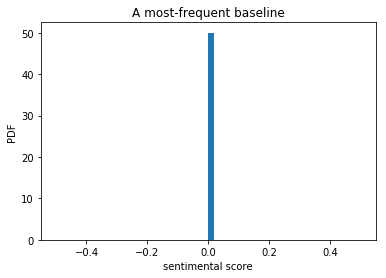

In [79]:
def bootstrap_replicate_1d(data,func):
    bs_sample=np.random.choice(data,len(data))
    return func(bs_sample)

def draw_bs_reps(data,func,size=1):
    bs_replicates=np.empty(size)
    for i in range(size):
        bs_replicates[i]=bootstrap_replicate_1d(data,func)
    return bs_replicates


# Take 25,000 bootstrap replicates of the mean on the test set predictions: size should equal to the number of documents
bs_replicates_random = draw_bs_reps(random_predictions,np.mean,size=25000)
 
# Compute and print SEM
sem = np.std(new_y) / np.sqrt(len(new_y))#calculate the standard deviation of the true value of the attitude
print(sem)
# Compute and print standard deviation of bootstrap replicates
bs_std_random = np.std(bs_replicates_random)
print(bs_std_random)
 
# Make a histogram of the results
_ = plt.hist(bs_replicates_random, bins=50, normed=True)
_ = plt.xlabel('sentimental score')
_ = plt.ylabel('PDF')
_ = plt.title('A most-frequent baseline')
 
# Show the plot
plt.show()

0.003162277660168379
0.0031449091216860306


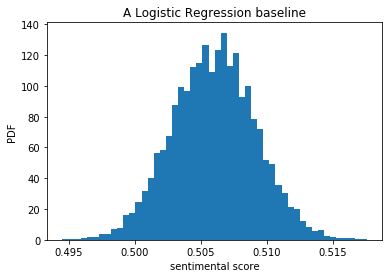

In [80]:
bs_replicates_logireg = draw_bs_reps(new_predictions,np.mean,size=25000)
 
# Compute and print SEM
sem = np.std(new_y) / np.sqrt(len(new_y))#calculate the standard deviation of the true value of the attitude
print(sem)
# Compute and print standard deviation of bootstrap replicates
bs_std_logireg = np.std(bs_replicates_logireg)
print(bs_std_logireg)
 
# Make a histogram of the results
_ = plt.hist(bs_replicates_logireg, bins=50, normed=True)
_ = plt.xlabel('sentimental score')
_ = plt.ylabel('PDF')
_ = plt.title('A Logistic Regression baseline')
 
# Show the plot
plt.show()


0.003162277660168379
0.0031548149659490336


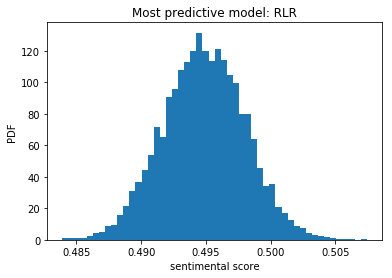

In [81]:
bs_replicates_optm = draw_bs_reps(new_predictions_RLR,np.mean,size=25000)
 
# Compute and print SEM
sem = np.std(new_y) / np.sqrt(len(new_y))#calculate the standard deviation of the true value of the attitude
print(sem)
# Compute and print standard deviation of bootstrap replicates
bs_std_optm = np.std(bs_replicates_optm)
print(bs_std_optm)
 
# Make a histogram of the results
_ = plt.hist(bs_replicates_optm, bins=50, normed=True)
_ = plt.xlabel('sentimental score')
_ = plt.ylabel('PDF')
_ = plt.title('Most predictive model: RLR')
 
# Show the plot
plt.show()

In [84]:
from scipy import stats
stat_val_random, p_val_random = stats.ttest_ind(new_y, bs_replicates_random, equal_var=False)
stat_val_logireg, p_val_logireg = stats.ttest_ind(new_y, bs_replicates_logireg, equal_var=False)
stat_val_RLR, p_val_RLR = stats.ttest_ind(new_y, bs_replicates_optm, equal_var=False)

print ('Most-frequent baseline: t-statistic D = %6.3f, p-value = %6.4f' % (stat_val_random, p_val_random))
print ('Logistic regression: t-statistic D = %6.3f, p-value = %6.4f' % (stat_val_logireg, p_val_logireg))
print ('Randomized logistic regression: D = %6.3f, p-value = %6.4f' % (stat_val_RLR, p_val_RLR))


Most-frequent baseline: t-statistic D = 158.111, p-value = 0.0000
Logistic regression: t-statistic D = -1.892, p-value = 0.0585
Randomized logistic regression: D =  1.625, p-value = 0.1042


As can be inferred, the logistic regression with feature selection has the most predictive result, with p-value=0.0585. Because the multiple layer perceptron doesn't seem to get an improved predictive result, here we don't show the significance testing result of it.

From the logistic regression plottings, the distrbution is quite balanced which is a satisfactory result, as our test data is also balancedly labelled (12,500 positive & 12,500 negative).

## 3. Visualizations (6 pts)

Provide at least 3 visualizations for 2pts each of your work above. Use labels and legends. Be creative. Just please do not use word clouds...

### Topic modeling with LDA

In [85]:
# your code here

# get a list of all the topic scores for each document
scores = [[t[1] for t in topic_corpus[entry]] for entry in range(25000)]

# turn that into a data frame with N rows and K columns, each with the score of the corresponding topic
topic_distros = pd.DataFrame(data=scores, columns=descriptors)

# add the review attitude of each document (so we can aggregate)
topic_distros['attitude'] = df3.attitude[:25000]

In [86]:
topic_distros.head()

,"war, kill","book, family","kid, episode","waste, horror",attitude
0,0.144238,0.539968,0.064837,0.250957,positive
1,0.653852,0.272071,0.036450,0.037627,positive
2,0.081883,0.534080,0.302519,0.081518,positive
3,0.503481,0.033686,0.430119,0.032713,positive
4,0.045842,0.223577,0.685975,0.044606,positive


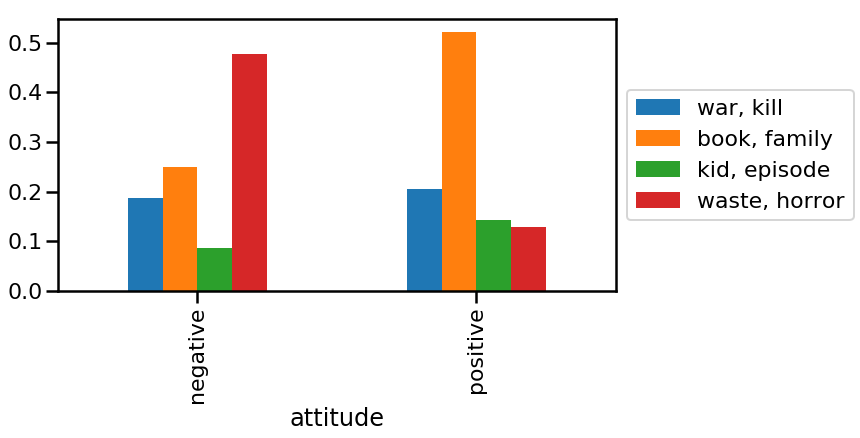

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt # make graphs
import seaborn # make prettier graphs

seaborn.set_context('poster') # use large font

fig, ax = plt.subplots(figsize=(10, 5)) # set graph size
# aggregate topics by review categories
aggregate_by_attitude = topic_distros.groupby(topic_distros.attitude).mean()
# plot the graph
aggregate_by_attitude[descriptors].plot.bar(ax=ax);
# move the legend out
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

In [88]:
# aggregate topics by review categories
aggregate_by_attitude = topic_distros.groupby(topic_distros.attitude).mean()
B=aggregate_by_attitude.T
d = B.to_dict(orient='records')

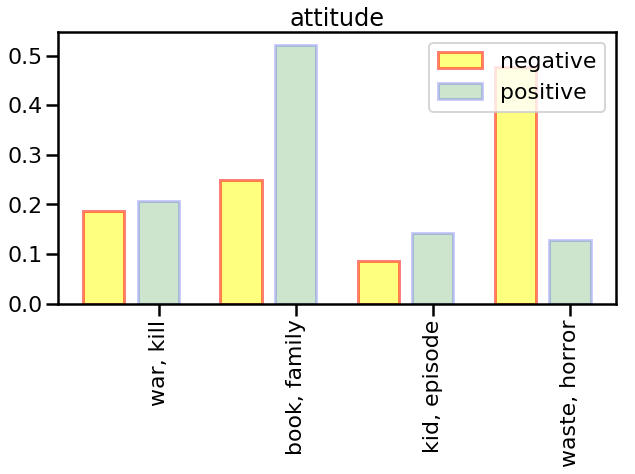

In [90]:
nlist=[]
plist=[]
for i in d:
    nlist.append(i["negative"])
    plist.append(i["positive"])

seaborn.set_context('poster')

fig, ax = plt.subplots(figsize=(10, 5)) # set graph size
plt.bar(np.arange(4), nlist,tick_label=B.index,alpha=0.5, width=0.3, color='yellow', edgecolor='red', label='negative', lw=3)#第一个参数为x轴元素的个数，第二个元素为y轴的值，第三个元素为x轴各元    素的值
plt.bar(np.arange(4)+0.4, plist,tick_label=B.index,alpha=0.2, width=0.3, color='green', edgecolor='blue', label='positive', lw=3)
plt.legend(loc='upper right')
import pylab as pl
pl.xticks(rotation=90)
plt.title('attitude')
plt.show()

##### Comments:
As can be inferred from both of the above plottings grouped by atiitudes and topics, we can tell that normally for war movies and animation cartoons, the sentimental attitudes are quite evenly splitted. But for the family comedies, there are more positive comments. While for the horror films, the comments are mostly negative.

In [92]:
# LDA
from sklearn.decomposition import LatentDirichletAllocation
n_topics=4 #num of topics adjusted after plotting
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=50,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda.fit(X)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=50, mean_change_tol=0.001,
             n_components=4, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [93]:
# We use intertopic distance map to capture the most frequent terms of each topic.
# This is supposed to be an interactive map. Please rerun if it doesn't show up or use the html link in the file folder.
import pyLDAvis
import pyLDAvis.sklearn
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
pyLDAvis.display(vis)

In [96]:
pyLDAvis.save_html(vis, 'lda.html')

### Dense word embedding

In [97]:
# word embedding
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline


def tsne_plot(model, title):
    "Creates an TSNE model and plots it"
    labels = []
    tokens = []
    

    for word in model.wv.index2word:
        tokens.append(model[word])
        labels.append(word)
    
    
    # fit the model into 2 dimensions(n_components=2)
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    
    
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    
    plt.title("Word embedding visualization of {}".format(title),fontsize=24)
    plt.show()

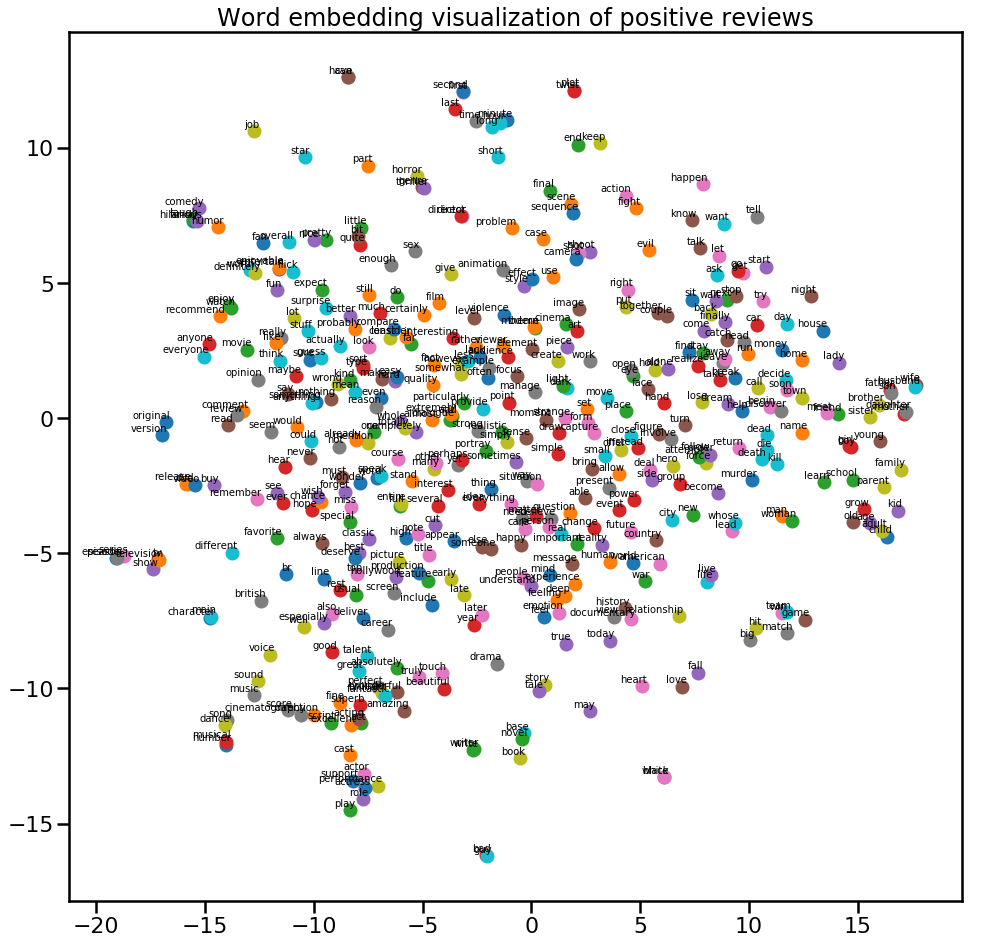

In [99]:
logging.basicConfig(format = '%(asctime)s : %(levelname)s : %(message)s', level = logging.ERROR)
warnings.filterwarnings("ignore", category = DeprecationWarning)
    
tsne_plot(model_pos, "positive reviews")

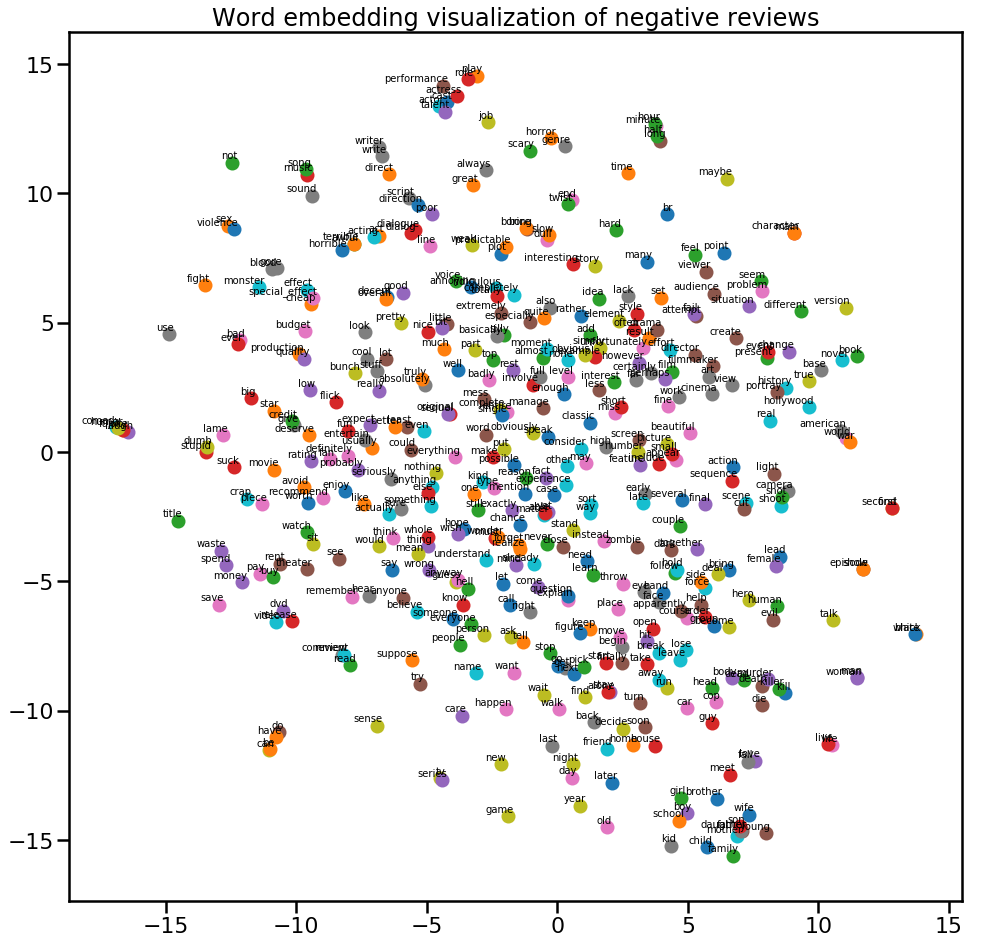

In [100]:
warnings.filterwarnings("ignore", category = DeprecationWarning)

tsne_plot(model_neg, "negative reviews")

### Clustering visualization

In [101]:
# clustering
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
import seaborn as sb

sb.set_context('poster')


def plot_vectors(vectors, title='Clustering visualization', labels=None, dimensions=3):
    """
    plot the vectors in 2 or 3 dimensions. If supplied, color them according to the labels
    """
    # set up graph
    fig = plt.figure(figsize=(10,10))

    # create data frame
    df = pd.DataFrame(data={'x':vectors[:,0], 'y': vectors[:,1]})
    # add labels, if supplied
    if labels is not None:
        df['label'] = labels
    else:
        df['label'] = [''] * len(df)

    # assign colors to labels
    cm = plt.get_cmap('tab20b') # choose the color palette
    n_labels = len(df.label.unique())
    label_colors = [cm(1. * i/n_labels) for i in range(n_labels)]
    cMap = colors.ListedColormap(label_colors)
        
    # plot in 3 dimensions
    if dimensions == 3:
        # add z-axis information
        df['z'] = vectors[:,2]
        # define plot
        ax = fig.add_subplot(111, projection='3d')
        frame1 = plt.gca() 
        # remove axis ticks
        frame1.axes.xaxis.set_ticklabels([])
        frame1.axes.yaxis.set_ticklabels([])
        frame1.axes.zaxis.set_ticklabels([])

        # plot each label as scatter plot in its own color
        for l, label in enumerate(df.label.unique()):
            df2 = df[df.label == label]
            ax.scatter(df2['x'], df2['y'], df2['z'], c=label_colors[l], cmap=cMap, edgecolor=None, label=label, alpha=0.3, s=100)
      
    # plot in 2 dimensions
    elif dimensions == 2:
        ax = fig.add_subplot(111)
        frame1 = plt.gca() 
        frame1.axes.xaxis.set_ticklabels([])
        frame1.axes.yaxis.set_ticklabels([])

        for l, label in enumerate(df.label.unique()):
            df2 = df[df.label == label]
            ax.scatter(df2['x'], df2['y'], c=label_colors[l], cmap=cMap, edgecolor=None, label=label, alpha=0.3, s=100)

    else:
        raise NotImplementedError()

    plt.title(title)
    plt.show()

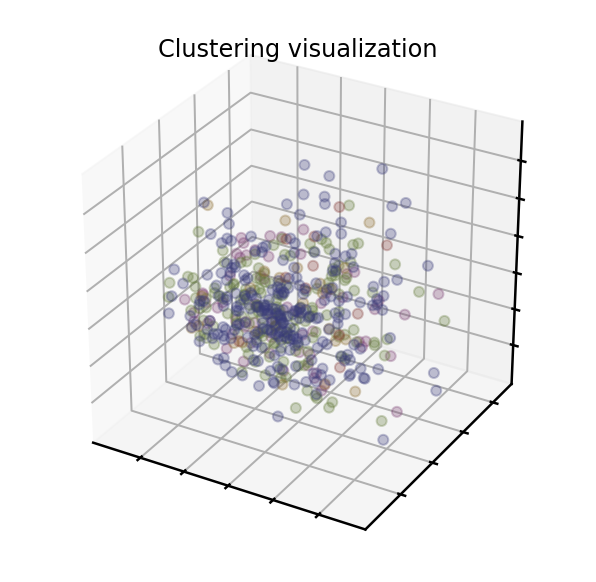

In [102]:
#clustering
svd = TruncatedSVD(n_components=300).fit_transform(X)

plot_sample = np.random.choice(len(svd), replace=False, size=8000)
plot_vectors(svd[plot_sample[:500]], labels=agg_sample[:500])